In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
# Importing the csv-file
df = pd.read_csv('/Users/julianuss/Documents/GitHub/sales-prediction-model/sales.csv')

In [4]:
df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [5]:
# Looking into the basic details of the DataFrame
print(df.info())
print(df.shape)
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB
None
(640840, 10)
          Unnamed: 0       store_ID    day_of_week  nb_customers_on_day  \
count  640840.000000  640840.000000  640840.000000        640840.000000   
mean   355990.675084     558.211348       4.000189           633.39857

In [6]:
print(df['state_holiday'].unique())
print(df['state_holiday'].nunique())

['0' 'a' 'c' 'b']
4


In [7]:
df.groupby('state_holiday')['sales'].sum()  # Summing sales for each state_holiday group

state_holiday
0    3697272529
a       3626172
b       1065876
c        468664
Name: sales, dtype: int64

In [8]:
# Defining the custom mapping
mapping = {'0': 0, 'c': 1, 'b': 2, 'a': 3}

# Applying the mapping to the 'state_holiday' column
df['state_holiday_encoded'] = df['state_holiday'].map(mapping)

# Verifying the encoding
print(df['state_holiday_encoded'].unique())

[0 3 1 2]


In [9]:
df.head()


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,state_holiday_encoded
0,425390,366,4,2013-04-18,517,1,0,0,0,4422,0
1,291687,394,6,2015-04-11,694,1,0,0,0,8297,0
2,411278,807,4,2013-08-29,970,1,1,0,0,9729,0
3,664714,802,2,2013-05-28,473,1,1,0,0,6513,0
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882,0


In [10]:
# Assuming your dataframe is named 'df'
df['date'] = pd.to_datetime(df['date'])
# Extract the quarter from the date and create a new column
df['quarter'] = df['date'].dt.quarter
# Display the first few rows to check
print(df[['date', 'quarter']].head())

df = df.drop("date", axis =1)
df = df.drop("state_holiday", axis =1)


        date  quarter
0 2013-04-18        2
1 2015-04-11        2
2 2013-08-29        3
3 2013-05-28        2
4 2013-10-10        4


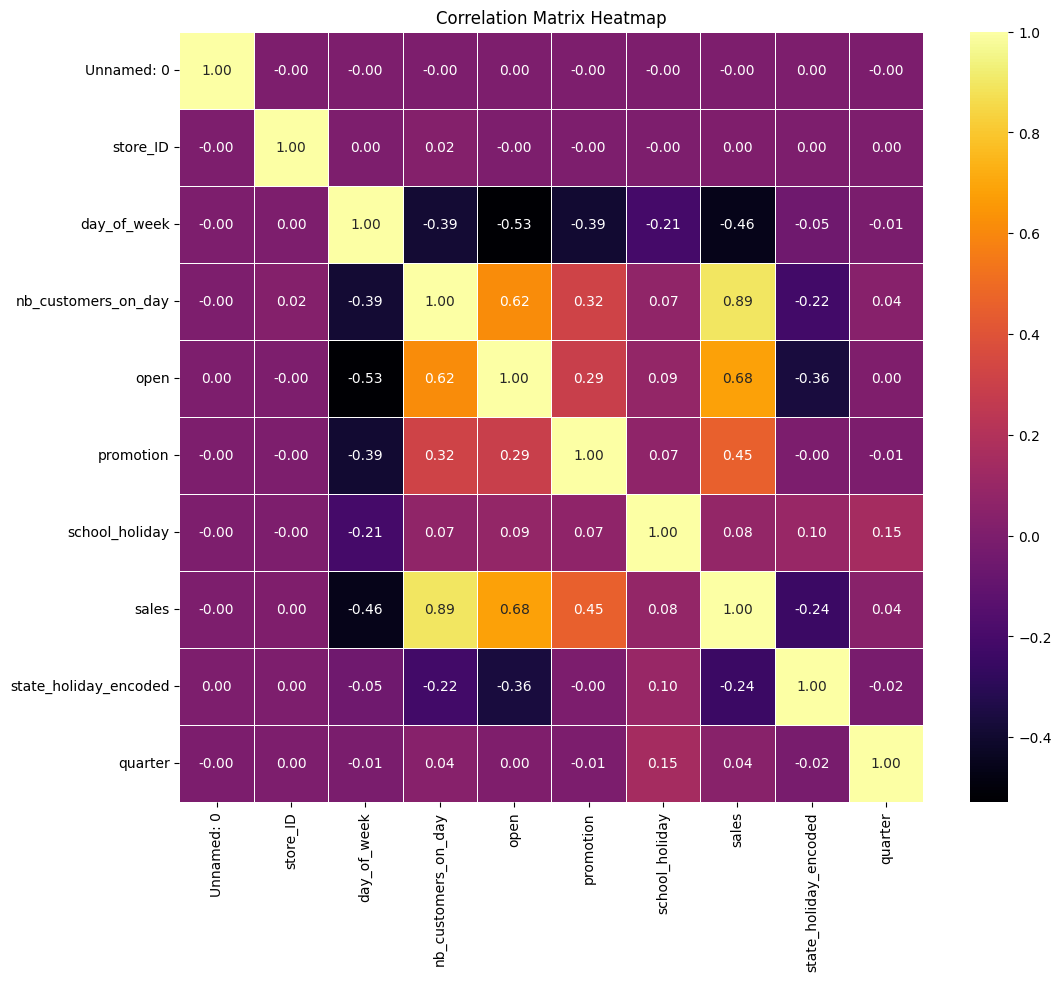

In [11]:
corr_matrix = df.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)

# Set title and display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
# One-hot encoding 'day_of_week'
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

In [13]:
df.head()

,Unnamed: 0,store_ID,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_encoded,quarter,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,425390,366,517,1,0,0,4422,0,2,False,False,True,False,False,False
1,291687,394,694,1,0,0,8297,0,2,False,False,False,False,True,False
2,411278,807,970,1,1,0,9729,0,3,False,False,True,False,False,False
3,664714,802,473,1,1,0,6513,0,2,True,False,False,False,False,False
4,540835,726,1068,1,1,0,10882,0,4,False,False,True,False,False,False


In [14]:
df['sales_per_customer'] = df['sales'] / df['nb_customers_on_day']

# If you want to compute the total sales and total customers for each store and find the ratio:
store_sales_customers = df.groupby('store_ID').agg({'sales': 'sum', 'nb_customers_on_day': 'sum'}).reset_index()

# Now compute the ratio of sales per customer for each store
store_sales_customers['sales_per_customer_ratio'] = store_sales_customers['sales'] / store_sales_customers['nb_customers_on_day']

# Display the result
print(store_sales_customers[['store_ID', 'sales_per_customer_ratio']])

      store_ID  sales_per_customer_ratio
0            1                  8.448965
1            2                  8.471213
2            3                  9.223982
3            4                  7.317723
4            5                  8.655336
...        ...                       ...
1110      1111                 11.662776
1111      1112                 12.197177
1112      1113                  9.225763
1113      1114                  6.434579
1114      1115                 14.451357

[1115 rows x 2 columns]


In [15]:
print(df.columns)

Index(['Unnamed: 0', 'store_ID', 'nb_customers_on_day', 'open', 'promotion',
       'school_holiday', 'sales', 'state_holiday_encoded', 'quarter',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'sales_per_customer'],
      dtype='object')


In [16]:
# Identifying the skewness of the 'sales per customer per store' column
skewness = df['sales_per_customer'].skew()
print(f'Skewness sales_per_customer: {skewness:.4f}')

Skewness sales_per_customer: 0.5751


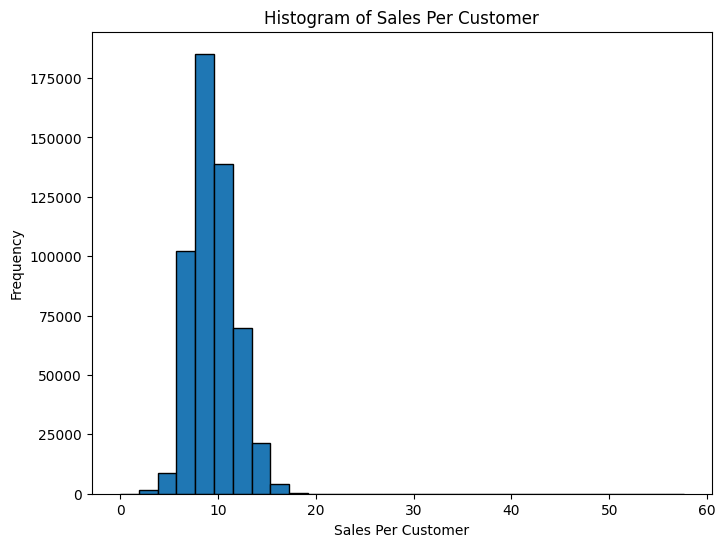

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['sales_per_customer'], bins=30, edgecolor='black')
plt.title('Histogram of Sales Per Customer')
plt.xlabel('Sales Per Customer')
plt.ylabel('Frequency')
plt.show()

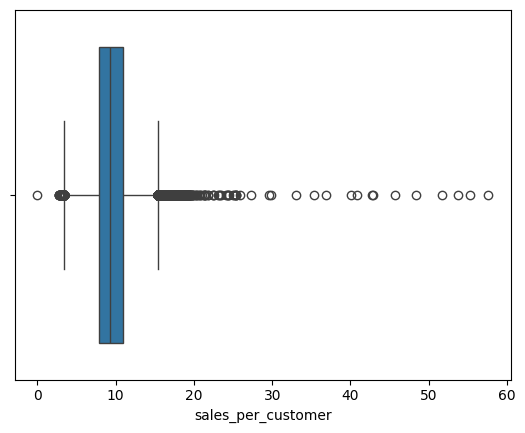

In [18]:
sns.boxplot(x=df['sales_per_customer'])
plt.show()

In [19]:
df.head()

,Unnamed: 0,store_ID,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_encoded,quarter,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,sales_per_customer
0,425390,366,517,1,0,0,4422,0,2,False,False,True,False,False,False,8.553191
1,291687,394,694,1,0,0,8297,0,2,False,False,False,False,True,False,11.955331
2,411278,807,970,1,1,0,9729,0,3,False,False,True,False,False,False,10.029897
3,664714,802,473,1,1,0,6513,0,2,True,False,False,False,False,False,13.769556
4,540835,726,1068,1,1,0,10882,0,4,False,False,True,False,False,False,10.189139


In [20]:
df['sales_per_customer'].nunique()

441778